In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 일일 확진자 수 파일(9월 4일까지)
df1 = pd.read_csv('./data_2/daily2.csv', header='infer',encoding = 'euc-kr', na_values=[' '])

In [4]:
# 결측치 제거
df1.dropna(inplace=True)

In [5]:
# 날짜 기준 오름차순 정렬
df1.sort_values(by='date', ascending = True, inplace=True)

In [6]:
# 인덱스 재정렬
df1.reset_index(drop = True, inplace=True)

In [7]:
# 열 이름 변경
df1['confirmed_day'] = df1['confirmed']

In [8]:
df1.drop('confirmed', axis=1, inplace=True)

In [9]:
# 확진자 수 타입 int로 변경
df1['confirmed_day'] = df1['confirmed_day'].astype('int64')

In [10]:
# 전체 데이터 중 전체 지역 합계 데이터만 추출
df1_sum = df1[df1['province']=='합계']

In [11]:
# 인덱스 초기화
df1_sum.reset_index(drop = True, inplace=True)

In [12]:
# 3월 1일 이전 데이터 추가
df1_time= pd.read_csv('./data_2/Time_2.csv', header='infer',encoding = 'utf-8', na_values=[' '])

In [13]:
# 일일 확진자수 열 생성
df1_time['confirmed_day'] = df1_time['confirmed']

In [14]:
# 일일 확진자수 계산
for i in range(df1_time.shape[0]):
    if i == 0:
        df1_time.iloc[0, 7] = df1_time.iloc[0, 4]
    elif i >= 1:
        df1_time.iloc[i, 7] = df1_time.iloc[i, 4] - df1_time.iloc[i-1, 4]

In [15]:
# 정책 데이터프레임
df2 = pd.read_csv('./data_2/Policy.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [16]:
# 정책 아이디를 인덱스로 설정
df2.set_index(['policy_id'], inplace=True)

In [17]:
# 정책 중 Health 타입만 추출
df2_health = df2[df2['type']=='Health']

## 마스크 공공 판매 전

In [18]:
# 데이터 프레임 생성
df1_before_mask_public = df1_time[(df1_time['date'] <= df2.loc[27, 'start_date'])]

In [19]:
# daily2.csv와 concat 할 경우 대비
df1_before_mask_public['province'] = '합계'

In [20]:
# 필요한 열만 추출
df1_before_mask_public = df1_before_mask_public[['province', 'date', 'confirmed_day']]

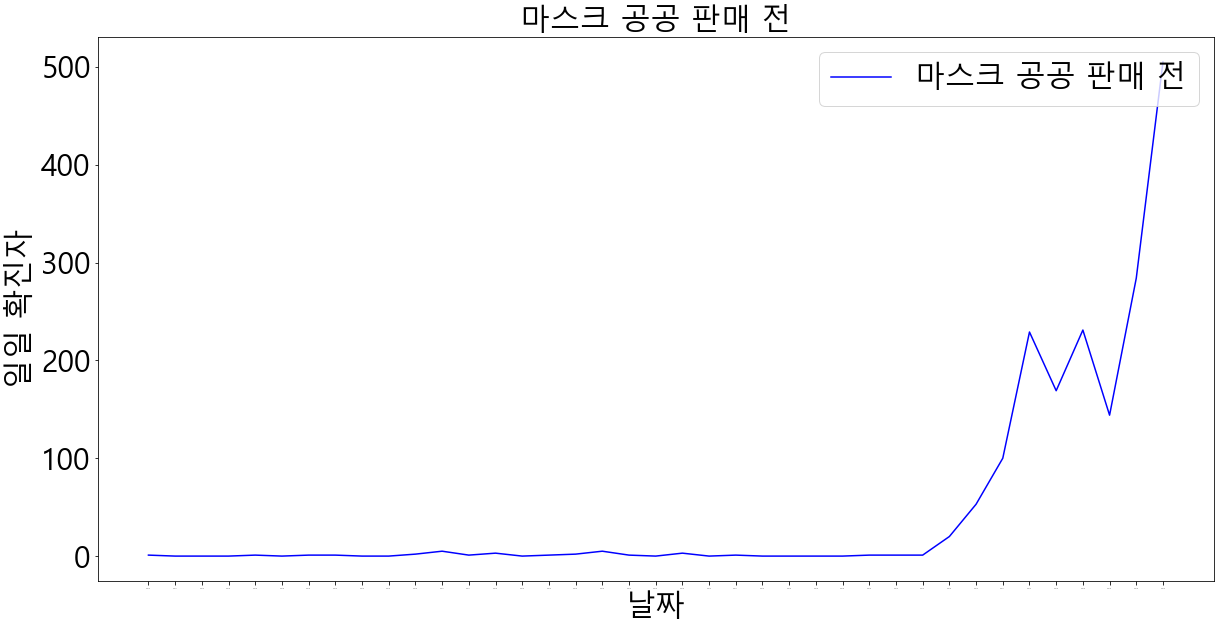

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(df1_before_mask_public['date'], df1_before_mask_public['confirmed_day'],label='마스크 공공 판매 전', color='blue')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('마스크 공공 판매 전', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 마스크 공공 판매 전 코로나 확진자 수가 급증하여 공공 판매를 시작했음을 알 수 있다

## 마스크 공공 판매 시작

In [22]:
# 데이터 프레임 생성
df1_mask_public = df1_time[(df1_time['date'] >= df2.loc[27, 'start_date']) & (df1_time['date'] <= df2.loc[28, 'start_date'])]

In [23]:
# daily2.csv와 concat 할 경우 대비
df1_mask_public['province'] = '합계'

In [24]:
# 필요한 열만 추출
df1_mask_public = df1_mask_public[['province', 'date', 'confirmed_day']]

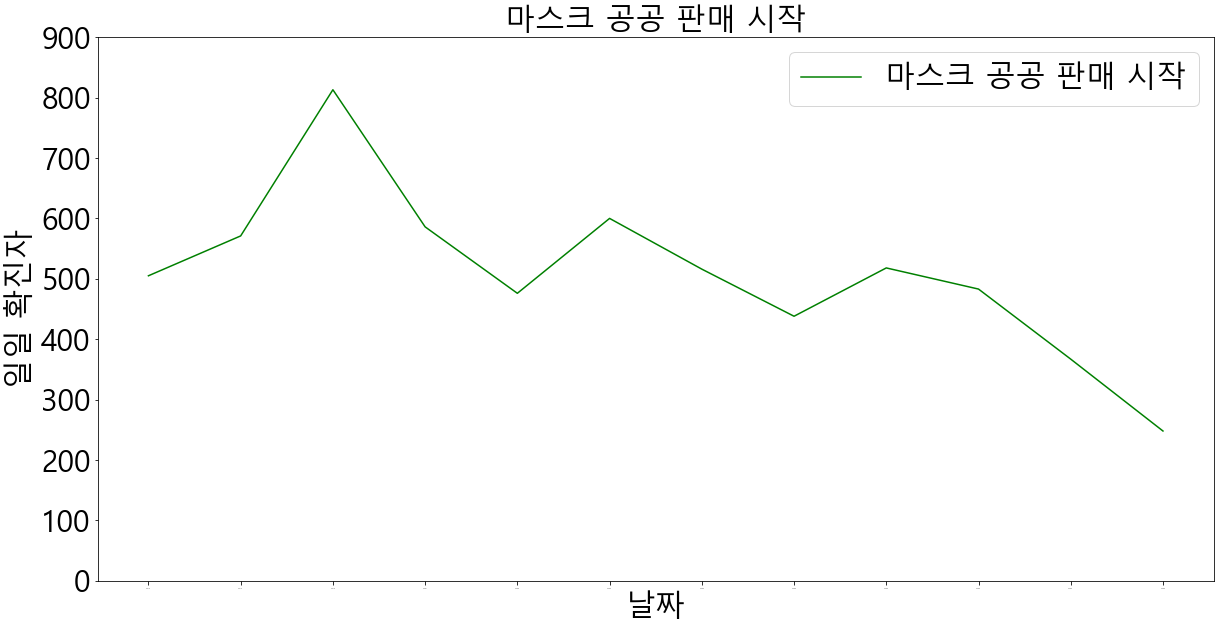

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(df1_mask_public['date'], df1_mask_public['confirmed_day'],label='마스크 공공 판매 시작', color='green')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.ylim(0, 900)
plt.title('마스크 공공 판매 시작', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 마스크 공공 판매 시작 후 코로나 확진자가 어느 정도 감소하고 있는 것을 볼 수 있다.

## 마스크 5부제 시작

In [26]:
# 데이터 프레임 생성
df1_mask_5_day = df1_time[(df1_time['date'] >= df2.loc[28, 'start_date']) & (df1_time['date'] <= df2.loc[28, 'end_date'])]

In [27]:
df1_mask_5_day['province'] = '합계'

In [28]:
df1_mask_5_day = df1_mask_5_day[['province', 'date', 'confirmed_day']]

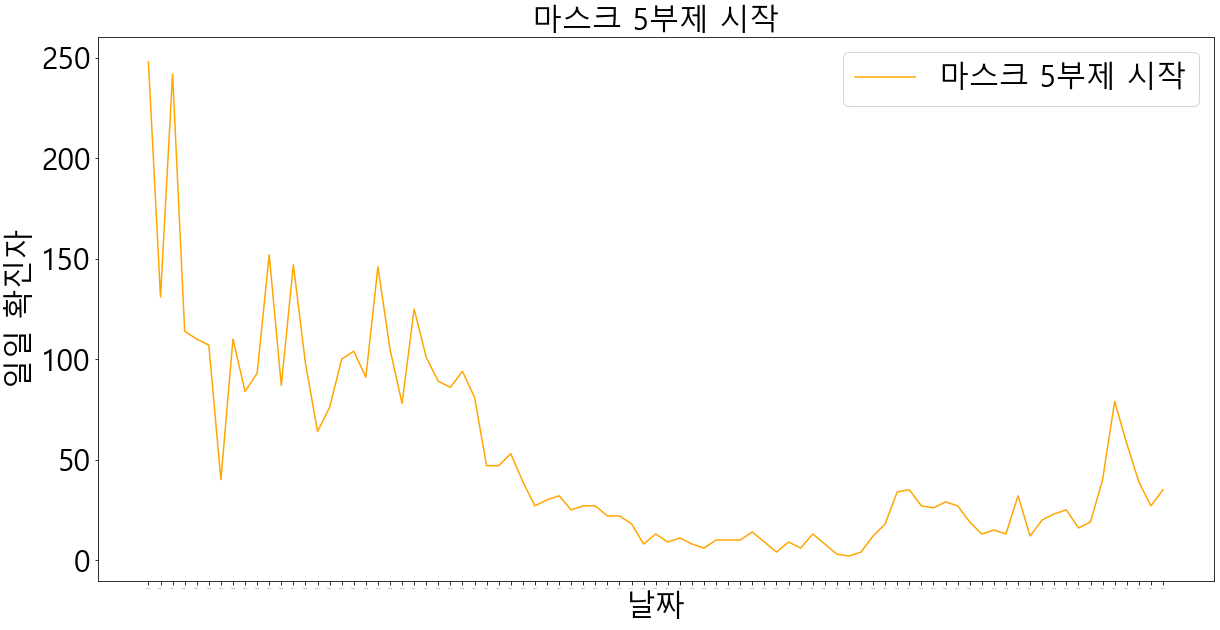

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(df1_mask_5_day['date'], df1_mask_5_day['confirmed_day'],label='마스크 5부제 시작', color='orange')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('마스크 5부제 시작', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 마스크 5부제 시작 후 코로나 확진자 수가 감소하고 있는 것을 볼 수 있다.

## 마스크 5부제 종료 후

In [30]:
# 마스크 5부제 종료 이후부터 6월 30일까지
df1_after_5_day_left = df1_time[(df1_time['date'] >= df2.loc[28, 'end_date'])]

In [31]:
df1_after_5_day_left['province'] = '합계'

In [32]:
df1_after_5_day_left = df1_after_5_day_left[['province', 'date', 'confirmed_day']]

In [33]:
# 7월 1일부터 9월 4일까지
df1_after_5_day_right = df1_sum[(df1_sum['date'] >= '2020-07-01')]

In [34]:
# 두 데이터프레임 concat
df1_after_5_day = pd.concat([df1_after_5_day_left, df1_after_5_day_right])

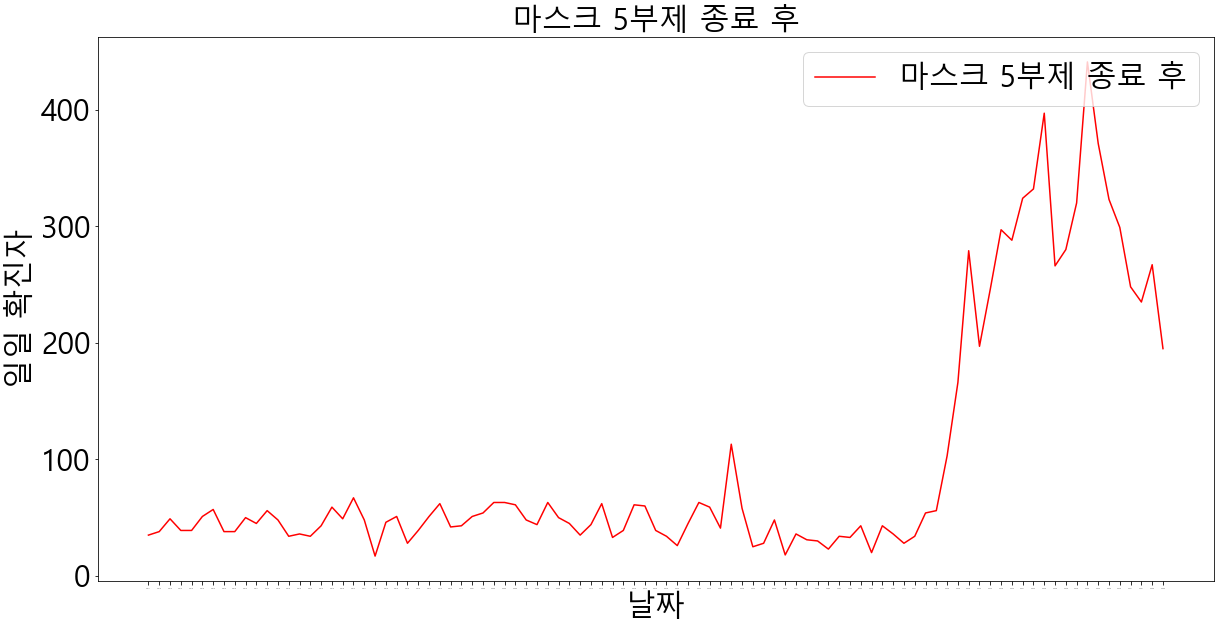

In [35]:
plt.figure(figsize=(20, 10))
plt.plot(df1_after_5_day['date'], df1_after_5_day['confirmed_day'],label='마스크 5부제 종료 후', color='red')
plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('마스크 5부제 종료 후', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 마스크 물량이 충분하여 마스크 5부제를 종료하였고 마스크 물량과는 상관없이 코로나 확진자는 계속 나오고 있음을 알 수 있다.

## 마스크 정책에 따른 코로나 확진자 수 변화

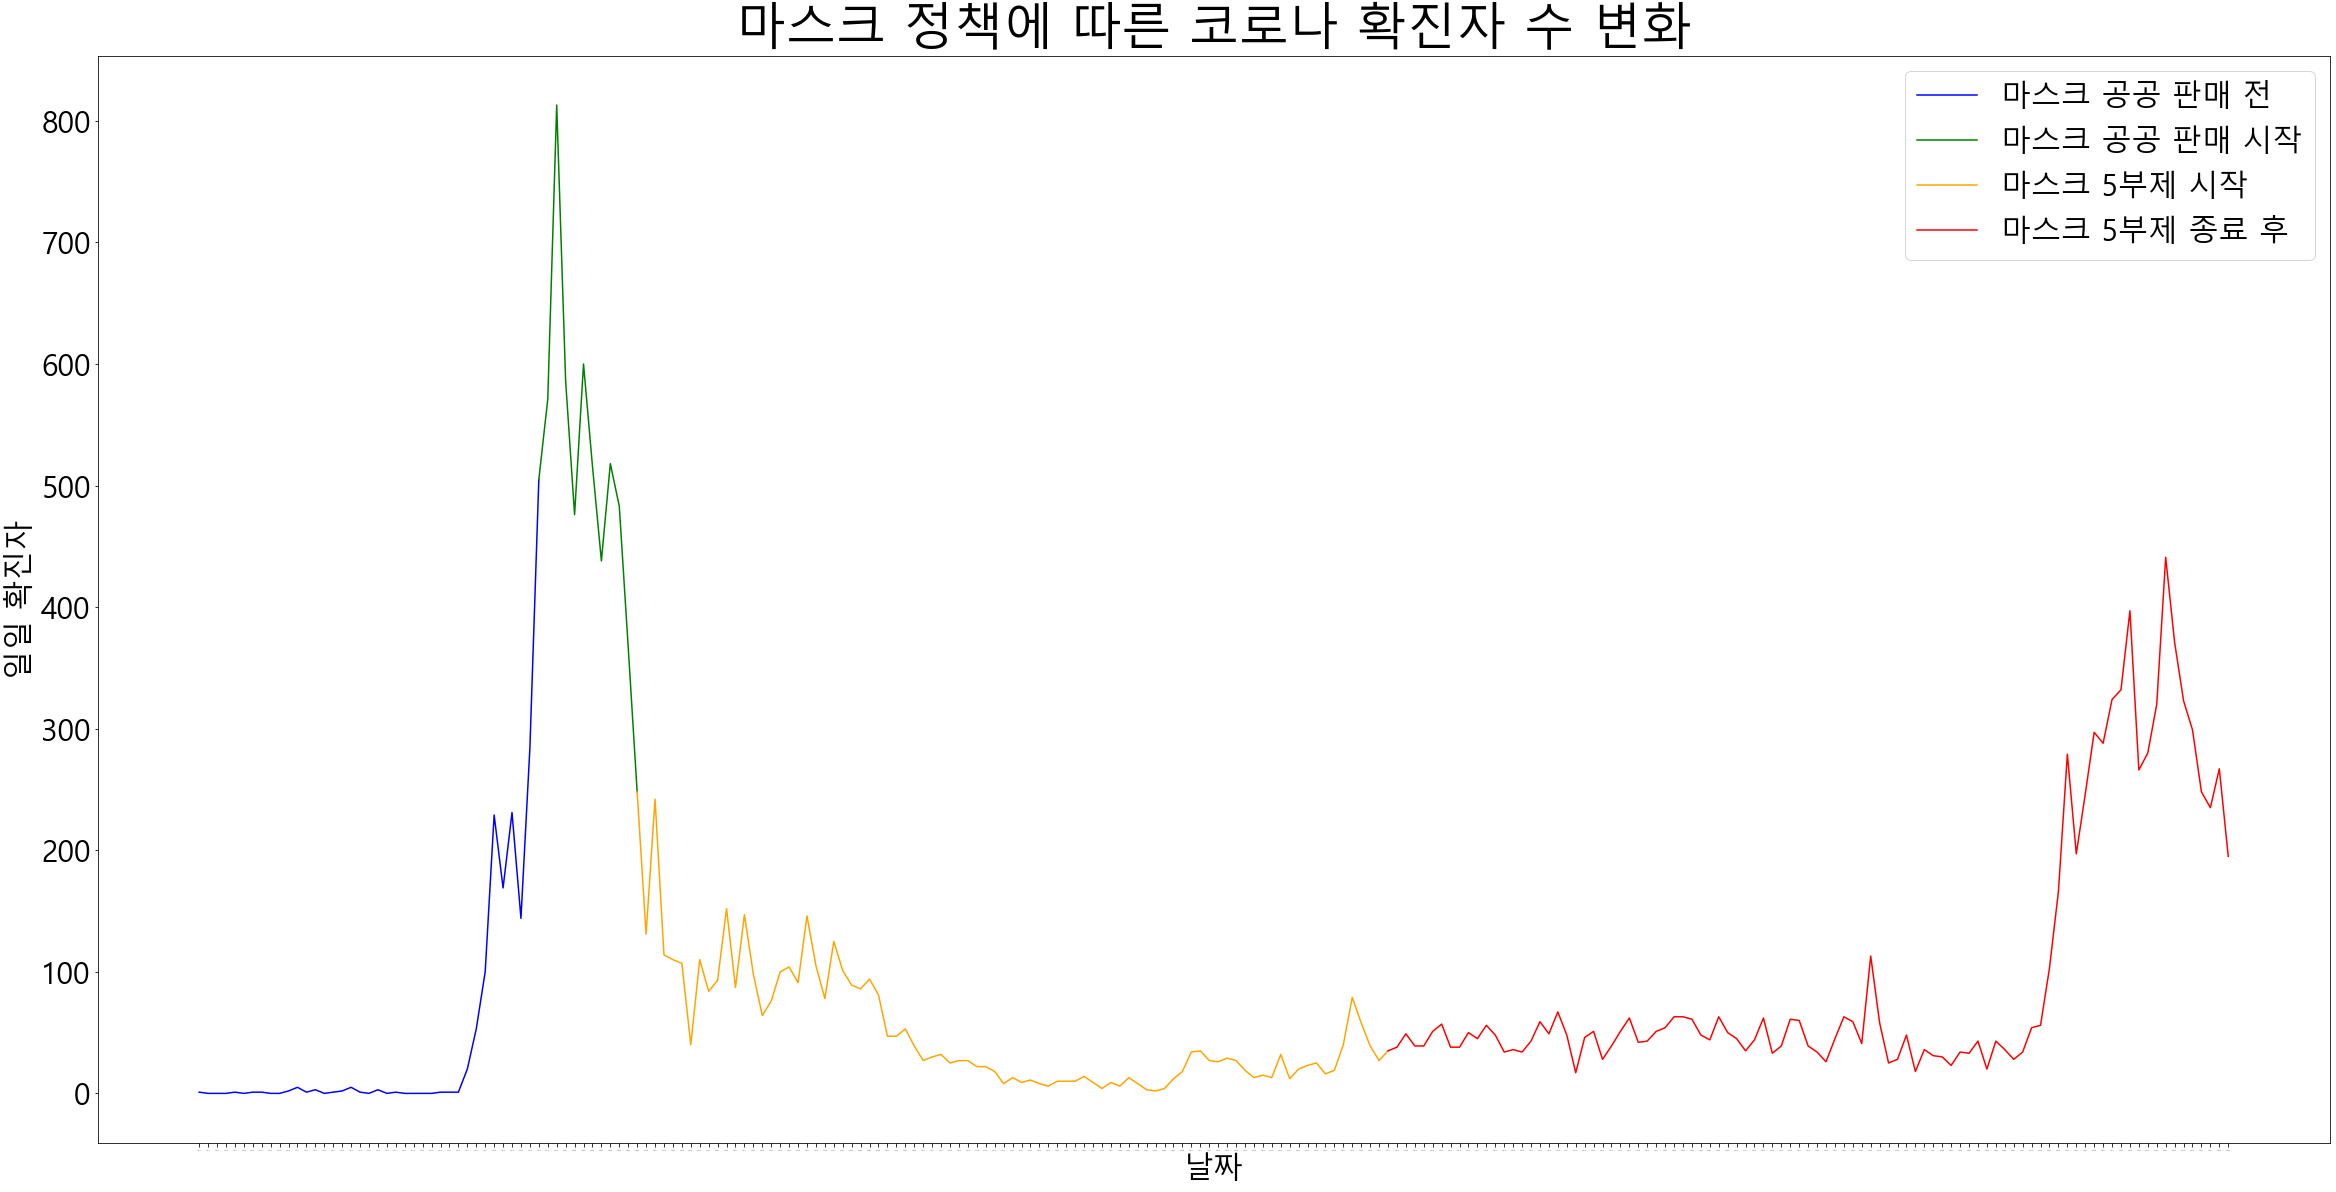

In [36]:
plt.figure(figsize=(40, 20))
plt.plot(df1_before_mask_public['date'], df1_before_mask_public['confirmed_day'],label='마스크 공공 판매 전', color='blue')
plt.plot(df1_mask_public['date'], df1_mask_public['confirmed_day'],label='마스크 공공 판매 시작', color='green')
plt.plot(df1_mask_5_day['date'], df1_mask_5_day['confirmed_day'],label='마스크 5부제 시작', color='orange')
plt.plot(df1_after_5_day['date'], df1_after_5_day['confirmed_day'],label='마스크 5부제 종료 후', color='red')

plt.xlabel('날짜', fontsize=30)
plt.ylabel('일일 확진자', fontsize=30)
plt.xticks(fontsize=0)
plt.yticks(fontsize=30)
plt.title('마스크 정책에 따른 코로나 확진자 수 변화', fontsize=50)
plt.legend(loc='upper right', fontsize=30)
plt.show()

#### 마스크 공공 판매와 마스크 5부제 시행으로 코로나 일일 확진자 수가 감소하긴 하였으나 5부제 종료 후에도 코로나 확진자가 계속 나오는 것을 보아 마스크 보급이 원활해져도 코로나 확진을 완전히 막아주지는 못하는 것을 알수 있다.